# Recurring Times - Interactive Maps with LEAFMAP

## Imports

In [1]:
# %pip install leafmap --quiet --no-cache-dir

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [3]:
import copy
from unidecode import unidecode
import pandas as pd
import geopandas as gpd
from scipy import stats

from pathlib import Path
from pretty_html_table import build_table
from jinja2 import Environment
from jinja2 import FileSystemLoader

from hydrology.hydrology import Hydrology
from hydrology.utils import disable_warnings, fig2base64

import leafmap

In [4]:
disable_warnings()

In [5]:
# hydro = Hydrology()

## Read stations

In [6]:
# Stations to be analyzed
df = pd.read_csv('../../tmp/Estacoes_Cheias_RS-2.csv', sep=';', parse_dates=['Data'])
df

Bacia              Estacao    Codigo  Cota    Vazao       Data  \
0   Taquari         Santa Tereza  86472600  2232      NaN 2024-05-02   
1   Taquari                Muçum  86510000  2557  13242.0 2024-05-02   
2   Taquari              Estrela  86879300  3335  22951.0 2024-05-02   
3   Taquari    Bom Retiro do Sul  86882000  2174      NaN 2024-05-02   
4     Jacuí       Dona Francisca  85400000  1113   3823.0 2024-04-30   
5     Jacuí            Rio Pardo  85900000  2004  13547.0 2024-05-05   
6       Caí                Feliz  87165000  1401      NaN 2024-05-02   
7       Caí         Barra do Caí  87170000  1760   1855.0 2024-05-02   
8       Caí  Costa do rio Cadeia  87230000  1208    325.0 2024-05-01   
9   Uruguai         Santo Angelo  75230000   763   2885.0 2024-05-05   
10  Uruguai                 Iraí  74100000  1267  26050.0 2024-05-03   
11  Uruguai           Itapiranga  74329000  1186  25710.0 2024-05-03   
12  Uruguai           Porto Maua  74720000  1500      NaN 2024-05-04   
13  Uruguai         Porto Lucena  74800000  1153  39771.0 2024-05-05   
14  Uruguai            Garruchos  75550000  1746  26375.0 2024-05-06   
15  Uruguai         Manoel Viana  76560000  1482   8028.0 2024-05-06   
16  Uruguai             Alegrete  76750000  1280   1153.0 2024-05-03   

    Latitude  Longitude  Telemetrica  
0   -29.1781   -51.7322         True  
1   -29.1672   -51.8686         True  
2   -29.4733   -51.9622         True  
3   -29.6164   -51.9383        False  
4   -29.6269   -53.3528         True  
5   -29.9950   -52.3756         True  
6   -29.4550   -51.3061        False  
7   -29.5900   -51.3833         True  
8   -29.5906   -51.3136         True  
9   -28.3553   -54.2675         True  
10  -27.1756   -53.2297         True  
11  -27.1717   -53.7097         True  
12  -27.5781   -54.6831         True  
13  -27.8525   -55.0256         True  
14  -28.1822   -55.6433         True  
15  -29.5958   -55.4814         True  
16  -29.7683   -55.7875         True

In [7]:
# Convert to GeoPandas
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

In [8]:
# export to GeoJson
# gdf.to_file("../../tmp/Estacoes_Cheias_RS.geojson", driver="GeoJSON")

## The Map

In [9]:
import folium

In [10]:
y, x = -29.010922, -52.949992
xmin = -57.86
ymin = -32.5
xmax = -48.59
ymax = -22.5


### Add Stations as ad-hoc markers

In [11]:
gdf

Bacia              Estacao    Codigo  Cota    Vazao       Data  \
0   Taquari         Santa Tereza  86472600  2232      NaN 2024-05-02   
1   Taquari                Muçum  86510000  2557  13242.0 2024-05-02   
2   Taquari              Estrela  86879300  3335  22951.0 2024-05-02   
3   Taquari    Bom Retiro do Sul  86882000  2174      NaN 2024-05-02   
4     Jacuí       Dona Francisca  85400000  1113   3823.0 2024-04-30   
5     Jacuí            Rio Pardo  85900000  2004  13547.0 2024-05-05   
6       Caí                Feliz  87165000  1401      NaN 2024-05-02   
7       Caí         Barra do Caí  87170000  1760   1855.0 2024-05-02   
8       Caí  Costa do rio Cadeia  87230000  1208    325.0 2024-05-01   
9   Uruguai         Santo Angelo  75230000   763   2885.0 2024-05-05   
10  Uruguai                 Iraí  74100000  1267  26050.0 2024-05-03   
11  Uruguai           Itapiranga  74329000  1186  25710.0 2024-05-03   
12  Uruguai           Porto Maua  74720000  1500      NaN 2024-05-04   
13  Uruguai         Porto Lucena  74800000  1153  39771.0 2024-05-05   
14  Uruguai            Garruchos  75550000  1746  26375.0 2024-05-06   
15  Uruguai         Manoel Viana  76560000  1482   8028.0 2024-05-06   
16  Uruguai             Alegrete  76750000  1280   1153.0 2024-05-03   

    Latitude  Longitude  Telemetrica                     geometry  
0   -29.1781   -51.7322         True  POINT (-51.73220 -29.17810)  
1   -29.1672   -51.8686         True  POINT (-51.86860 -29.16720)  
2   -29.4733   -51.9622         True  POINT (-51.96220 -29.47330)  
3   -29.6164   -51.9383        False  POINT (-51.93830 -29.61640)  
4   -29.6269   -53.3528         True  POINT (-53.35280 -29.62690)  
5   -29.9950   -52.3756         True  POINT (-52.37560 -29.99500)  
6   -29.4550   -51.3061        False  POINT (-51.30610 -29.45500)  
7   -29.5900   -51.3833         True  POINT (-51.38330 -29.59000)  
8   -29.5906   -51.3136         True  POINT (-51.31360 -29.59060)  
9   -28.3553   -54.2675         True  POINT (-54.26750 -28.35530)  
10  -27.1756   -53.2297         True  POINT (-53.22970 -27.17560)  
11  -27.1717   -53.7097         True  POINT (-53.70970 -27.17170)  
12  -27.5781   -54.6831         True  POINT (-54.68310 -27.57810)  
13  -27.8525   -55.0256         True  POINT (-55.02560 -27.85250)  
14  -28.1822   -55.6433         True  POINT (-55.64330 -28.18220)  
15  -29.5958   -55.4814         True  POINT (-55.48140 -29.59580)  
16  -29.7683   -55.7875         True  POINT (-55.78750 -29.76830)

In [12]:
from pathlib import Path
import branca
import unidecode

In [13]:
root = Path('/data/Vulnerability_output/RecurringTimes/IncludingMaxDischarges')

def load_html(station_name):
    station_name = unidecode.unidecode(station_name).replace(' ', '_')
    path = root/f'{station_name}.html'

    if path.exists():
        with open(path, 'r') as f:
            html = f.read()
        return html
    
    return None
# with open(root/'Alegrete.html', 'r') as f:
#     html = f.read()

In [14]:
m = folium.Map(
    max_bounds=True,
    location=(y, x),
    zoom_start=7,
    min_lat=ymin,
    min_lon=xmin,
    max_lat=ymax,
    max_lon=xmax,
    max_zoom=15,
    min_zoom=7
)

for idx, row in gdf.iterrows():
    lat, lon = row['Latitude'], row['Longitude'] 
    
    # before creating the marker, let's create an iframe with branca
    # the icon and popup depends on the type of station/discharges
    html = load_html(row['Estacao'])
    if not pd.isna(row['Vazao']) and html is not None:
        iframe = branca.element.IFrame(html=html, width=900, height=600)
        popup = folium.Popup(iframe, max_width=900)
        icon=folium.Icon(icon='water', color='blue', prefix='fa')
    else:
        icon=folium.Icon(icon='water', color='red', prefix='fa')
        popup=None
    

    # create the main marker
    marker = folium.Marker(
        location=[lat, lon],
        popup=popup,
        icon=icon,
        # popup=f"<b>Name</b>: {row['Estacao']}<br><b>Code:</b> {row['Codigo']}",
        # icon=folium.Icon(icon='water', color=marker_color[row['Telemetrica']], prefix='fa')
    )

    # create marker labels
    label = folium.Marker(
        location=[lat, lon],
        icon=folium.DivIcon(
            icon_size=(150,50),
            icon_anchor=(0, 0),
            html=f"<div style='font-size: 14px; font-weight: bold;'>{row['Estacao']}</div>"
        )
    )        
    

    m.add_child(marker)
    m.add_child(label)

m

In [15]:
m.save('/data/Vulnerability_output/RecurringTimes/tempos_retorno.html')

### Add Geojson at once

In [25]:
m = folium.Map(
    max_bounds=True,
    location=(y, x),
    zoom_start=7,
    min_lat=ymin,
    min_lon=xmin,
    max_lat=ymax,
    max_lon=xmax,
    max_zoom=15,
    min_zoom=7
)

folium.GeoJson('../../tmp/Estacoes_Cheias_RS.geojson').add_to(m)
m

In [10]:
import ipyleaflet

In [11]:
ipyleaflet.Map?

Init signature: ipyleaflet.Map(**kwargs)
Docstring:     
Map class.

The Map class is the main widget in ipyleaflet.

Attributes
----------
layers: list of Layer instances
    The list of layers that are currently on the map.
controls: list of Control instances
    The list of controls that are currently on the map.
center: list, default [0, 0]
    The current center of the map.
zoom: float, default 12
    The current zoom value of the map.
max_zoom: float, default None
    Maximal zoom value.
min_zoom: float, default None
    Minimal zoom value.
zoom_snap: float, default 1
    Forces the map’s zoom level to always be a multiple of this.
zoom_delta: float, default 1
    Controls how much the map’s zoom level will change after
    pressing + or - on the keyboard, or using the zoom controls.
crs: projection, default projections.EPSG3857
    Coordinate reference system, which can be ‘Earth’, ‘EPSG3395’, ‘EPSG3857’,
    ‘EPSG4326’, ‘Base’, ‘Simple’ or user defined projection.
dragging: boo

In [9]:
m = leafmap.Map(center=(40, -100), zoom=4)
m

Map(center=[40, -100], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [21]:
m.add_point_layer('../../tmp/Estacoes_Cheias_RS.geojson', popup='Estacao')

## Base Functions

In [58]:
# Main function to create the HTML 

jinja_env = Environment(loader=FileSystemLoader('./templates'))
template = jinja_env.get_template('trs.html')


def calc_recurring_times(row: pd.Series, include_max_q: bool=True):

    if pd.isna(row['Vazao']):
        raise ValueError(f'No discharge for station {row["Codigo"]}')

    # Get discharge from Hidro
    q = hydro.get_discharge(row['Codigo'])
    if len(q) <= 10:
        raise ValueError(f'No discharge series for station {row["Codigo"]}')

    # Include the maximum Discharge from this year
    q.loc[row['Data'], ['NivelConsistencia', 'EstacaoCodigo', 'Vazao']] = (1, row['Codigo'], row['Vazao'])
    maximum, fig = Hydrology.calc_return_times(q, 1, include_max_q=include_max_q)

    return maximum, fig

def create_html_report(row: pd.Series, include_max_q: bool=True):

    try:
        maximum, fig = calc_recurring_times(row, include_max_q=include_max_q)

        # Prepare data for the HTML page
        jinja_data = {
            'place': row['Estacao'] + '(' + str(row['Codigo']) + ')',
            'date': row['Data'],
            'hydrology_table': build_table(
                maximum.head(30), 
                color="blue_light",
                font_size='small',
                width_dict=["16%", "16%", "32%", "12%", "12%", "12%"]
            ),
            'hydrology_figure': fig2base64(fig)
        }
        html = template.render(jinja_data)

        return html
                

    except Exception as e:
        print(f'Error for station {row["Codigo"]}: {e}')
        


## Main Loop

In [81]:
base_dir = Path('/data/Vulnerability_output/RecurringTimes/')

for idx, row in df.iterrows():

    print(f'Processing stations {row["Estacao"]} - {row["Codigo"]}')

    # Create the HTML report for the station
    html = create_html_report(row, include_max_q=False)
    if html is None:
        continue

    # define output directory and file name
    outpath = base_dir/(unidecode(row['Estacao']).replace(' ', '_') + '.html')
    with open(outpath, "w", encoding="utf-8") as f:
        f.write(html) 

Processing stations Santa Tereza - 86472600
Error for station 86472600: No discharge for station 86472600
Processing stations Muçum - 86510000
Processing stations Estrela - 86879300
Error for station 86879300: No discharge series for station 86879300
Processing stations Bom Retiro do Sul - 86882000
Error for station 86882000: No discharge for station 86882000
Processing stations Dona Francisca - 85400000
Processing stations Rio Pardo - 85900000
Processing stations Feliz - 87165000
Error for station 87165000: No discharge for station 87165000
Processing stations Barra do Caí - 87170000
Processing stations Costa do rio Cadeia - 87230000
Processing stations Santo Angelo - 75230000
Processing stations Iraí - 74100000
Processing stations Itapiranga - 74329000
Processing stations Porto Maua - 74720000
Processing stations Porto Lucena - 74800000
Processing stations Garruchos - 75550000
Processing stations Manoel Viana - 76560000
Processing stations Alegrete - 76750000


In [80]:
q = hydro.get_discharge(76750000)
q.index.min()

Timestamp('1940-10-22 00:00:00')

## Skeweness and Kurtosis

In [106]:
from scipy.stats import lognorm, gumbel_r, skew, kurtosis
import numpy as np


In [111]:
for idx, row in df.iterrows():
    try:
        maximum, fig = calc_recurring_times(row, include_max_q=True)

        try:
            sk = skew(maximum['Vazao'][1:])
        except:
            sk = None

        try: 
            kurt = kurtosis(maximum['Vazao'][1:])
        except:
            kurt = None
            
        df.loc[idx, ['skew', 'kurt']] = [sk, kurt]

    except Exception as e:
        print(e)
        continue
    pass

No discharge for station 86472600
No discharge series for station 86879300
No discharge for station 86882000
No discharge for station 87165000


In [112]:
df

Bacia              Estacao    Codigo  Cota    Vazao       Data  \
0   Taquari         Santa Tereza  86472600  2232      NaN 2024-02-05   
1   Taquari                Muçum  86510000  2557  13242.0 2024-02-05   
2   Taquari              Estrela  86879300  3335  22951.0 2024-02-05   
3   Taquari    Bom Retiro do Sul  86882000  2174      NaN 2024-02-05   
4     Jacuí       Dona Francisca  85400000  1113   3823.0 2024-04-30   
5     Jacuí            Rio Pardo  85900000  2004  13547.0 2024-05-05   
6       Caí                Feliz  87165000  1401      NaN 2024-02-05   
7       Caí         Barra do Caí  87170000  1760   1855.0 2024-02-05   
8       Caí  Costa do rio Cadeia  87230000  1208    325.0 2024-01-05   
9   Uruguai         Santo Angelo  75230000   763   2885.0 2024-05-05   
10  Uruguai                 Iraí  74100000  1267  26050.0 2024-03-05   
11  Uruguai           Itapiranga  74329000  1186  25710.0 2024-03-05   
12  Uruguai           Porto Maua  74720000  1500  27665.0 2024-04-05   
13  Uruguai         Porto Lucena  74800000  1153  39771.0 2024-05-05   
14  Uruguai            Garruchos  75550000  1746  26375.0 2024-06-05   
15  Uruguai         Manoel Viana  76560000  1482   8028.0 2024-06-05   
16  Uruguai             Alegrete  76750000  1280   1153.0 2024-03-05   

    Latitude  Longitude Telemetrica      skew      kurt  
0   -29.1781   -51.7322        True       NaN       NaN  
1   -29.1672   -51.8686        True  0.431472 -0.570015  
2   -29.4733   -51.9622        True       NaN       NaN  
3   -29.6164   -51.9383       False       NaN       NaN  
4   -29.6269   -53.3528        True -0.641150  0.028479  
5   -29.9950   -52.3756        True  0.563814  0.749016  
6   -29.4550   -51.3061       False       NaN       NaN  
7   -29.5900   -51.3833        True -0.120032 -0.673794  
8   -29.5906   -51.3136        True  0.371986 -1.025691  
9   -28.3553   -54.2675        True  1.177630  1.371315  
10  -27.1756   -53.2297        True  0.982286  0.693873  
11  -27.1717   -53.7097        True  0.126718 -1.708020  
12  -27.5781   -54.6831        True -0.448176 -1.325818  
13  -27.8525   -55.0256        True  0.834734  0.399001  
14  -28.1822   -55.6433        True  0.238494 -0.589879  
15  -29.5958   -55.4814        True  0.795262  0.063817  
16  -29.7683   -55.7875        True -0.122909 -0.613278

In [108]:
df

Bacia              Estacao    Codigo  Cota    Vazao       Data  \
0   Taquari         Santa Tereza  86472600  2232      NaN 2024-02-05   
1   Taquari                Muçum  86510000  2557  13242.0 2024-02-05   
2   Taquari              Estrela  86879300  3335  22951.0 2024-02-05   
3   Taquari    Bom Retiro do Sul  86882000  2174      NaN 2024-02-05   
4     Jacuí       Dona Francisca  85400000  1113   3823.0 2024-04-30   
5     Jacuí            Rio Pardo  85900000  2004  13547.0 2024-05-05   
6       Caí                Feliz  87165000  1401      NaN 2024-02-05   
7       Caí         Barra do Caí  87170000  1760   1855.0 2024-02-05   
8       Caí  Costa do rio Cadeia  87230000  1208    325.0 2024-01-05   
9   Uruguai         Santo Angelo  75230000   763   2885.0 2024-05-05   
10  Uruguai                 Iraí  74100000  1267  26050.0 2024-03-05   
11  Uruguai           Itapiranga  74329000  1186  25710.0 2024-03-05   
12  Uruguai           Porto Maua  74720000  1500  27665.0 2024-04-05   
13  Uruguai         Porto Lucena  74800000  1153  39771.0 2024-05-05   
14  Uruguai            Garruchos  75550000  1746  26375.0 2024-06-05   
15  Uruguai         Manoel Viana  76560000  1482   8028.0 2024-06-05   
16  Uruguai             Alegrete  76750000  1280   1153.0 2024-03-05   

    Latitude  Longitude Telemetrica      skew       kurt  
0   -29.1781   -51.7322        True       NaN        NaN  
1   -29.1672   -51.8686        True  0.487152  -0.476396  
2   -29.4733   -51.9622        True       NaN        NaN  
3   -29.6164   -51.9383       False       NaN        NaN  
4   -29.6269   -53.3528        True -0.036161   1.360726  
5   -29.9950   -52.3756        True  1.999065   8.129185  
6   -29.4550   -51.3061       False       NaN        NaN  
7   -29.5900   -51.3833        True  1.215865   3.930825  
8   -29.5906   -51.3136        True  1.010781   0.583159  
9   -28.3553   -54.2675        True  3.916972  22.586164  
10  -27.1756   -53.2297        True  1.204690   1.415977  
11  -27.1717   -53.7097        True  0.029049  -1.640749  
12  -27.5781   -54.6831        True  0.996521  -0.305911  
13  -27.8525   -55.0256        True  0.959110   0.553715  
14  -28.1822   -55.6433        True  0.383391  -0.435205  
15  -29.5958   -55.4814        True  0.988331   0.639664  
16  -29.7683   -55.7875        True  0.123813  -0.080287

In [103]:
skew(maximum['Vazao'])

0.1238127625322594

In [100]:
args = gumbel_r.fit(maximum['Vazao'])

gumbel_r.stats(*args, moments='s')

1.1395470994046486

In [101]:
args = lognorm.fit(maximum['Vazao'])

lognorm.stats(*args, moments='s')

0.1444465202551067

Estações que não possuem série longa (menor que 15 anos) e que não tiveram ajuste aceitável:

* Porto Mauá (74720000): 2018->
* Itapiranga (74329000): 2015->
* Costa do rio Cadeia (87230000): 2010->

In [12]:
maximum.head(3)

Ano Hidro   Vazao       Data  TR Empirico  TR lognorm  TR gumbel_r
0  1941/1942  4984.2 1941-05-05         87.0     33528.8         64.5
1  2024/2025  3823.0 2024-04-30         43.5        91.6         13.7
2  1997/1998  3560.4 1997-10-16         29.0        35.2          9.8

In [67]:
df.to_csv('../../tmp/Estacoes_Cheias_RS.csv')

In [64]:
stations['TipoEstacaoTelemetrica'].astype('bool')

0        False
1        False
2         True
3         True
4        False
         ...  
38135    False
38136    False
38137    False
38138    False
38139    False
Name: TipoEstacaoTelemetrica, Length: 38140, dtype: bool

In [47]:
stations.columns

Index(['RegistroID', 'Descricao', 'Importado', 'Temporario', 'Removido',
       'ImportadoRepetido', 'BaciaCodigo', 'SubBaciaCodigo', 'RioCodigo',
       'EstadoCodigo', 'MunicipioCodigo', 'ResponsavelCodigo',
       'ResponsavelUnidade', 'ResponsavelJurisdicao', 'OperadoraCodigo',
       'OperadoraUnidade', 'OperadoraSubUnidade', 'TipoEstacao', 'Codigo',
       'Nome', 'CodigoAdicional', 'Latitude', 'Longitude', 'Altitude',
       'AreaDrenagem', 'TipoEstacaoEscala', 'TipoEstacaoRegistradorNivel',
       'TipoEstacaoDescLiquida', 'TipoEstacaoSedimentos',
       'TipoEstacaoQualAgua', 'TipoEstacaoPluviometro',
       'TipoEstacaoRegistradorChuva', 'TipoEstacaoTanqueEvapo',
       'TipoEstacaoClimatologica', 'TipoEstacaoPiezometria',
       'TipoEstacaoTelemetrica', 'PeriodoEscalaInicio', 'PeriodoEscalaFim',
       'PeriodoRegistradorNivelInicio', 'PeriodoRegistradorNivelFim',
       'PeriodoDescLiquidaInicio', 'PeriodoDescLiquidaFim',
       'PeriodoSedimentosInicio', 'PeriodoSedimento

In [42]:
stations['Codigo']

0           47000
1           47001
2           47002
3           47003
4           47004
           ...   
38135    90260000
38136    90270000
38137    90280000
38138    90290000
38139    90300000
Name: Codigo, Length: 38140, dtype: int64

In [48]:
stations.query('Codigo == 86510000')[['Latitude', 'Longitude']]

Latitude  Longitude
37573  -29.1672   -51.8686

In [4]:
station = hydro.get_station_stats(86510000)

/workspaces/vulnerability/src/hydrology/hydrology.py:322: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(


In [5]:
station

{'complete_months': 1004,
 'years': 83,
 'start_year': '1940/01',
 'end_year': '2024/01',
 'total_months': 1009,
 'missing_perc': '0.50%'}

In [6]:
# This structure below has River, station name, max_q and date.
# Uruguai	Santo Angelo	7523000	763	2885	05/05/2024
# Uruguai	Iraí	7410000	1267	26050	05/03/2024
# Uruguai	Itapiranga	7432900	1186	25710	05/03/2024
# Uruguai	Porto Maua	7472000	1500		05/04/2024
# Uruguai	Porto Lucena	7480000	1153	39771	05/05/2024
# Uruguai	Garruchos	7555000	1746	26375	05/06/2024
# Uruguai	Manoel Viana	7656000	1482	8028	05/06/2024
# Uruguai	Alegrete	7675000	1280	1153	05/03/2024

# write this table as a dictionary


In [7]:
  
stations = {
    86472600: {'name': 'Santa Tereza', 'stage': 2232, 'max_q': None, 'date': '2024-05-02 00:00:00'},
    86510000: {'name': 'Muçum', 'stage': 2557, 'max_q': 13242, 'date': '2024-05-02 00:00:00'},
    86879300: {'name': 'Estrela', 'stage': 3335, 'max_q': 22951, 'date': '2024-05-02 00:00:00'},
    86882000: {'name': 'Bom Retiro do Sul', 'stage': 2174, 'max_q': None, 'date': '2024-05-02 00:00:00'},
    85400000: {'name': 'Dona Francisca', 'stage': 1113, 'max_q': 3823, 'date': '2024-05-02 00:00:00'},
    85900000: {'name': 'Rio Pardo', 'stage': 2004, 'max_q': 13547, 'date': '2024-05-02 00:00:00'},
    87165000: {'name': 'Feliz', 'stage': 1401, 'max_q': None, 'date': '2024-05-02 00:00:00'},
    87170000: {'name': 'Barra do Caí', 'stage': 1760, 'max_q': None, 'date': '2024-05-02 00:00:00'},
    87230000: {'name': 'Costa do rio Cadeia', 'stage': 1208, 'max_q': 325, 'date': '2024-05-02 00:00:00'},
    75230000: {'name': 'Santo Angelo', 'stage': 763, 'max_q': 2885, 'date': '2024-05-02 00:00:00'},
    74100000: {'name': 'Iraí', 'stage': 1267, 'max_q': 26050, 'date': '2024-05-02 00:00:00'},
    74329000: {'name': 'Itapiranga', 'stage': 1186, 'max_q': 25710, 'date': '2024-05-02 00:00:00'},
    74720000: {'name': 'Porto Maua', 'stage': 1500, 'max_q': None, 'date': '2024-05-02 00:00:00'},
    74800000: {'name': 'Porto Lucena', 'stage': 1153, 'max_q': 39771, 'date': '2024-05-02 00:00:00'},
    75550000: {'name': 'Garruchos', 'stage': 1746, 'max_q': 26375, 'date': '2024-05-02 00:00:00'},
    76560000: {'name': 'Manoel Viana', 'stage': 1482, 'max_q': 8028, 'date': '2024-05-02 00:00:00'},
    76750000: {'name': 'Alegrete', 'stage': 1280, 'max_q': 1153, 'date': '2024-05-02 00:00:00'}
}



## Calculating with Historical Discharges (without including Max Discharge in the Series)

In [7]:
# d = copy.deepcopy(stations)
# code, values = d.popitem()

In [34]:
code = 86510000
values = stations[code]

In [35]:
q = hydro.get_discharge(code)

In [36]:
from scipy import stats
maximum, fig = Hydrology.calc_return_times(q, 1)


# Fit the distribution
# dist_args = Hydrology.fit_distribution(q['Vazao'], 'lognorm')
# distr = getattr(stats, 'lognorm')
maximum.head(3)

Ano Hidro    Vazao       Data  TR Empirico  TR lognorm  TR gumbel_r
0  2024/2025  13242.0 2024-05-02         86.0        46.0         35.6
1  2001/2002  12763.4 2001-10-01         43.0        36.6         29.3
2  2011/2012  12547.5 2011-07-21         28.7        33.1         26.9

In [39]:
distr = 'lognorm'
distribution = getattr(stats, distr)

args = distribution.fit(maximum['Vazao'][1:])
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))

# plot the corresponding chart
ax.hist(maximum["Vazao"], bins=10, density=True)

# Plot the distribution curve
Hydrology.plot_distribution_curve(distr, args, ax)

In [40]:
Hydrology.recurring_time(13242, distribution, *args)

57.50033510824885

In [13]:
maximum.iloc[1:]

Ano Hidro    Vazao       Data  TR Empirico  TR lognorm  TR gumbel_r
1   2011/2012  12547.5 2011-07-21         43.0        39.2         29.9
2   1989/1990  11213.5 1989-09-12         28.7        20.4         17.3
3   1946/1947  10972.5 1946-01-26         21.5        18.2         15.7
4   1965/1966  10761.0 1965-08-19         17.2        16.5         14.4
5   2008/2009  10669.4 2008-10-27         14.3        15.8         13.9
..        ...      ...        ...          ...         ...          ...
80  2004/2005   1967.2 2004-07-16          1.1         1.1          1.1
81  1943/1944   1783.8 1943-08-03          1.0         1.1          1.0
82  1952/1953   1629.0 1952-06-09          1.0         1.0          1.0
83  2012/2013   1467.6 2012-09-21          1.0         1.0          1.0
84  1962/1963    588.9 1962-09-21          1.0         1.0          1.0

[84 rows x 6 columns]

## Considering the Max Discharge in the Series

In [8]:
for code, values in stations.items():
    if not values['max_q']:
        continue
    try:
        print(f'Processing {code}')
        q = hydro.get_discharge(code)
        q.loc[values['date'], ['NivelConsistencia', 'EstacaoCodigo', 'Vazao']] = (1, code, values['max_q'])
        maximum, fig = Hydrology.calc_return_times(q, 1, include_max_q=True)
        stations[code]['df'] = maximum
        stations[code]['fig'] = fig
        
    except Exception as e:
        print(f'Error in station {code}')
        print(e)



Processing 86510000
Processing 86879300


/workspaces/vulnerability/src/hydrology/hydrology.py:322: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6120: RuntimeWarning: divide by zero encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6010: RuntimeWarning: invalid value encountered in log
  lambda x, s: -np.log(x)**2 / (2*s**2) - np.log(s*x*np.sqrt(2*np.pi)),
/workspaces/vulnerability/src/hydrology/hydrology.py:322: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(


Error in station 86879300
loop of ufunc does not support argument 0 of type float which has no callable exp method
Processing 85400000
Processing 85900000


/workspaces/vulnerability/src/hydrology/hydrology.py:322: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(


Processing 87230000


/workspaces/vulnerability/src/hydrology/hydrology.py:322: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(


Processing 75230000


/workspaces/vulnerability/src/hydrology/hydrology.py:322: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(


Processing 74100000


/workspaces/vulnerability/src/hydrology/hydrology.py:322: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(


Processing 74329000


/workspaces/vulnerability/src/hydrology/hydrology.py:322: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(


Processing 74800000


/workspaces/vulnerability/src/hydrology/hydrology.py:322: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(


Processing 75550000


/workspaces/vulnerability/src/hydrology/hydrology.py:322: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(


Processing 76560000


/workspaces/vulnerability/src/hydrology/hydrology.py:322: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(


Processing 76750000


/workspaces/vulnerability/src/hydrology/hydrology.py:322: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(


Tempo de Retorno para Dona Francisca (85400000)
   Ano Hidro   Vazao       Data  TR Empirico  TR lognorm  TR gumbel_r
0  1941/1942  4984.2 1941-05-05         87.0      8001.0         58.0
1  2024/2025  3823.0 2024-05-02         43.5        52.5         12.8
2  1997/1998  3560.4 1997-10-16         29.0        23.1          9.2
3  1940/1941  3233.4 1940-07-17         21.8         9.8          6.1
4  2010/2011  3126.7 2010-01-05         17.4         7.6          5.4
5  2015/2016  3075.6 2015-12-25         14.5         6.8          5.1
6  2003/2004  3011.0 2003-12-16         12.4         6.0          4.7
7  2017/2018  2988.9 2017-05-28         10.9         5.7          4.6
8  2023/2024  2967.6 2023-11-19          9.7         5.5          4.5
9  1942/1943  2966.1 1942-05-18          8.7         5.4          4.5


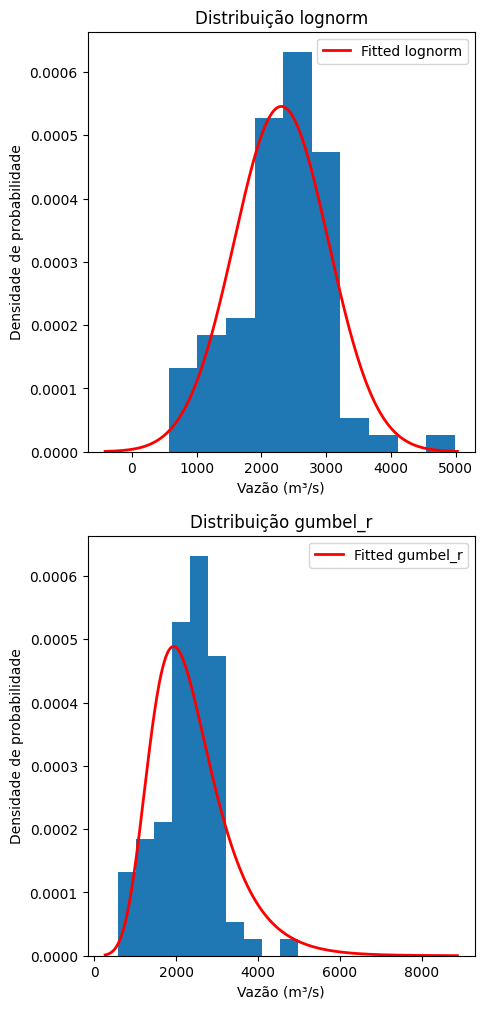

In [22]:
# d = copy.deepcopy(stations)
code, values = d.popitem()
print(f'Tempo de Retorno para {values["name"]} ({code})')

print(values['df'].head(10))
values['fig']

Tempo de Retorno para Dona Francisca (85400000)
    Ano Hidro   Vazao       Data  TR Empirico  TR lognorm  TR gumbel_r
0   1941/1942  4984.2 1941-05-05         87.0      8001.0         58.0
1   2024/2025  3823.0 2024-05-02         43.5        52.5         12.8
2   1997/1998  3560.4 1997-10-16         29.0        23.1          9.2
3   1940/1941  3233.4 1940-07-17         21.8         9.8          6.1
4   2010/2011  3126.7 2010-01-05         17.4         7.6          5.4
..        ...     ...        ...          ...         ...          ...
81  1939/1940   820.6 1939-12-20          1.1         1.0          1.0
82  2006/2007   780.5 2006-07-28          1.0         1.0          1.0
83  1968/1969   727.1 1968-10-08          1.0         1.0          1.0
84  2004/2005   667.2 2004-11-10          1.0         1.0          1.0
85  1962/1963   570.0 1962-01-15          1.0         1.0          1.0

[86 rows x 6 columns]


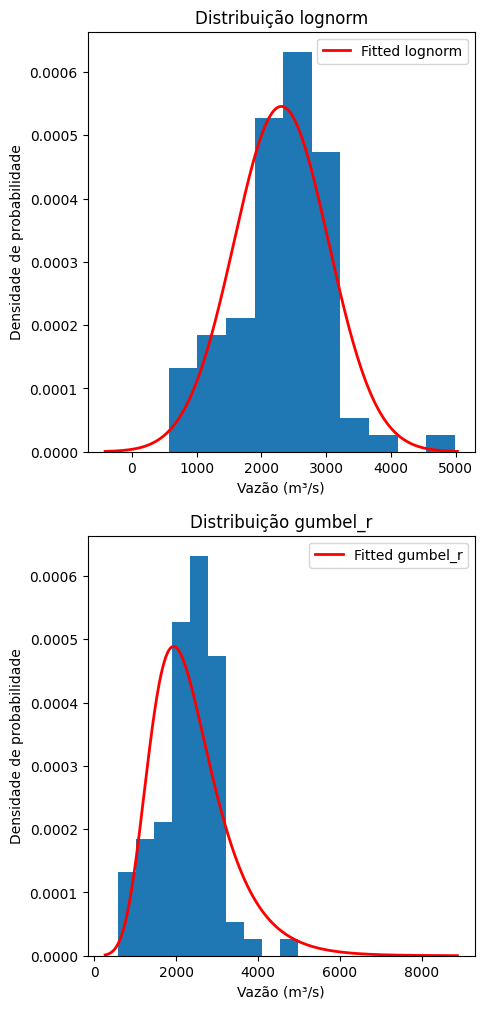

In [48]:
code, values = d.popitem()
print(f'Tempo de Retorno para {values["name"]} ({code})')

print(values['df'])
values['fig']

In [49]:
code, values = d.popitem()
print(f'Tempo de Retorno para {values["name"]} ({code})')

print(values['df'])
values['fig']

Tempo de Retorno para Estrela (86879300)


KeyError: 'df'

Tempo de Retorno para Muçum (86510000)
    Ano Hidro    Vazao       Data  TR Empirico  TR lognorm  TR gumbel_r
0   2024/2025  13242.0 2024-05-02         86.0        57.5         39.2
1   2001/2002  12763.4 2001-10-01         43.0        44.9         32.1
2   2011/2012  12547.5 2011-07-21         28.7        40.2         29.4
3   1989/1990  11213.5 1989-09-12         21.5        20.6         17.0
4   1946/1947  10972.5 1946-01-26         17.2        18.3         15.4
..        ...      ...        ...          ...         ...          ...
80  2004/2005   1967.2 2004-07-16          1.1         1.1          1.1
81  1943/1944   1783.8 1943-08-03          1.0         1.0          1.0
82  1952/1953   1629.0 1952-06-09          1.0         1.0          1.0
83  2012/2013   1467.6 2012-09-21          1.0         1.0          1.0
84  1962/1963    588.9 1962-09-21          1.0         1.0          1.0

[85 rows x 6 columns]


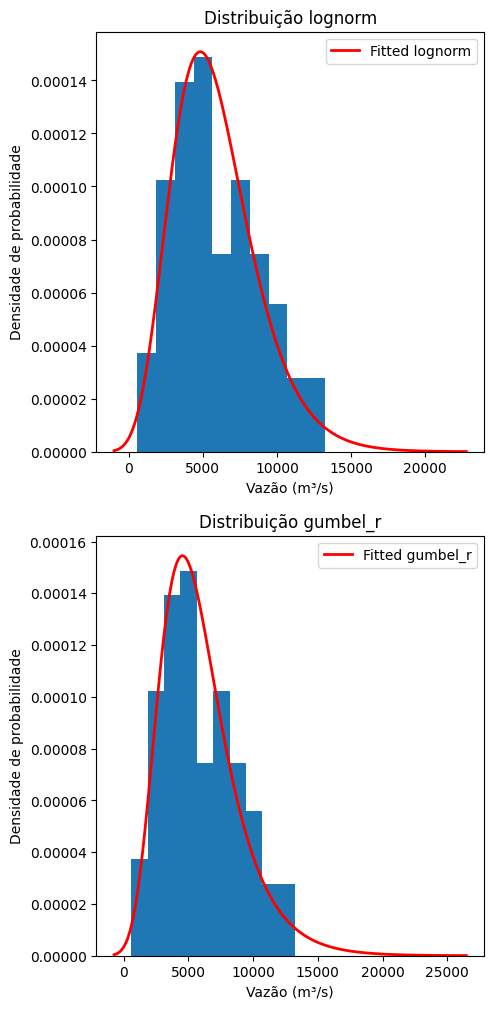

In [ ]:
code, values = d.popitem()
print(f'Tempo de Retorno para {values["name"]} ({code})')

print(values['df'])
values['fig']

In [ ]:
d.popitem()

(1, 3)

In [ ]:
d

{}

In [ ]:
code

86879300

In [ ]:
q = hydro.get_discharge(code)
q.loc[date, ['NivelConsistencia', 'EstacaoCodigo', 'Vazao']] = (1, code, max_q)

In [ ]:
maximum, fig = Hydrology.calc_return_times(q, 1)

Tempo de Retorno para Muçum (86510000)
    Ano Hidro    Vazao       Data  TR Empirico  TR lognorm  TR gumbel_r
0   2024/2025  13242.0 2024-05-02         86.0        46.0         35.6
1   2001/2002  12763.4 2001-10-01         43.0        36.6         29.3
2   2011/2012  12547.5 2011-07-21         28.7        33.1         26.9
3   1989/1990  11213.5 1989-09-12         21.5        17.8         15.7
4   1946/1947  10972.5 1946-01-26         17.2        16.0         14.3
5   1965/1966  10761.0 1965-08-19         14.3        14.5         13.2
6   2008/2009  10669.4 2008-10-27         12.3        13.9         12.7
7   1997/1998  10592.0 1997-08-04         10.8        13.5         12.3
8   1956/1957  10581.9 1956-04-05          9.6        13.4         12.3
9   2020/2021  10536.6 2020-07-08          8.6        13.1         12.0
10  1941/1942   9836.2 1941-05-05          7.8         9.7          9.2
11  2009/2010   9484.2 2009-09-12          7.2         8.3          8.0
12  2023/2024   9303.2 20

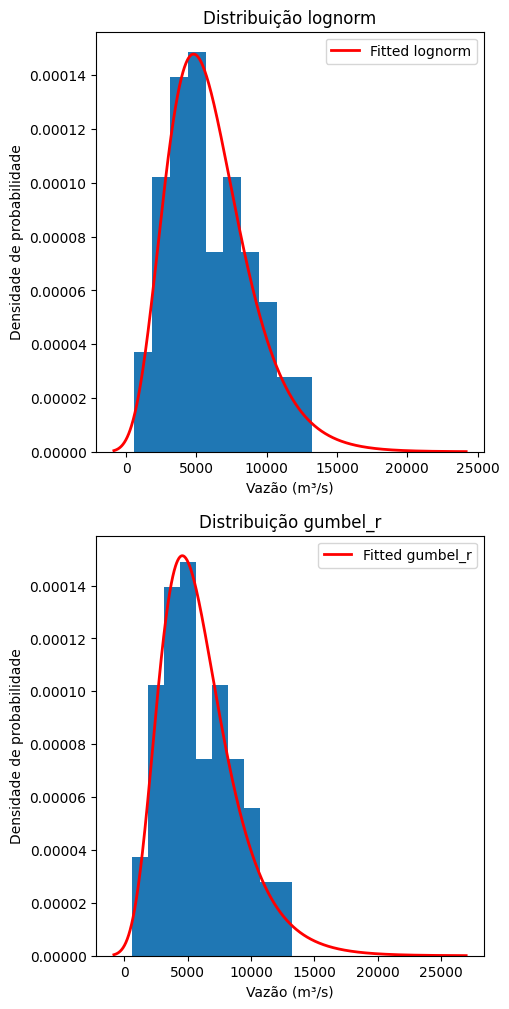

In [ ]:
# Tempo de Retorno - Muçum ()
print(f'Tempo de Retorno para {name} ({code})')
print(maximum.head(15))
fig

In [ ]:
q = pd.read_sql(
    sql='select * from hidro.estacao where Codigo = 86510000',
    con=hydro.conn,
)
stations

/tmp/ipykernel_1567/3451927587.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  stations = pd.read_sql(


RegistroID  ...                                           geom_wkb
0   3736928.0  ...  b'\x01\x01\x00\x00\x00\x1e\xa7\xe8H.\xefI\xc0&...

[1 rows x 72 columns]

In [ ]:
stations

RegistroID  ...                                           geom_wkb
0       6896268.0  ...  b'\x01\x01\x00\x00\x00fffff\xc6G\xc0\xcd\xcc\x...
1       6896269.0  ...  b'\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\xc0...
2       6896270.0  ...  b'\x01\x01\x00\x00\x00\xcc\xee\xc9\xc3B\xadG\x...
3       6896271.0  ...  b'\x01\x01\x00\x00\x00\xcc\xee\xc9\xc3B\xedG\x...
4       6896272.0  ...  b'\x01\x01\x00\x00\x00x\x9c\xa2#\xb9\x8cG\xc0v...
...           ...  ...                                                ...
38135  38439616.0  ...  b'\x01\x01\x00\x00\x00[B>\xe8\xd9\xa8S\xc0\xa7...
38136  38439617.0  ...  b'\x01\x01\x00\x00\x00\xae\xb6b\x7f\xd9\xbdS\x...
38137  38439618.0  ...  b'\x01\x01\x00\x00\x00\x9bU\x9f\xab\xad\xe8S\x...
38138  38439619.0  ...  b'\x01\x01\x00\x00\x00p_\x07\xce\x19\x05T\xc0T...
38139  38439620.0  ...  b'\x01\x01\x00\x00\x00\xcc]K\xc8\x07\xcdS\xc0@...

[38140 rows x 72 columns]

In [ ]:

stations.query("ESTCOLETA == 'T' and ESTRESPONSAVEL == 1.0").head()

ESTCODIGO  ...                                           geom_wkb
2  113961120  ...  b"\x01\x01\x00\x00\x00\xecQ\xb8\x1e\x85\x9bN\x...
3   30667570  ...  b'\x01\x01\x00\x00\x00\xce\x88\xd2\xde\xe0\xfb...
4   12469250  ...  b'\x01\x01\x00\x00\x00\x1d8gDi[Q\xc0\xff\xb2{\...
5     867050  ...  b'\x01\x01\x00\x00\x00h"lxz\xc5P\xc0V}\xae\xb6...
6   72570010  ...  b'\x01\x01\x00\x00\x00=\n\xd7\xa3p\x81Q\xc0\x9...

[5 rows x 26 columns]

In [ ]:
stations.query("Codigo == 86510000")

RegistroID  ...                                           geom_wkb
37573   3736928.0  ...  b'\x01\x01\x00\x00\x00\x1e\xa7\xe8H.\xefI\xc0&...

[1 rows x 72 columns]

In [ ]:
stations.ESTCODIGO

0       261451040
1       263550450
2       113961120
3        30667570
4        12469250
          ...    
6459    202742590
6460    225750460
6461    224151380
6462    224951350
6463    224352260
Name: ESTCODIGO, Length: 6464, dtype: int64

In [ ]:
stations['ESTCOLETA'].unique()

array(['T', 'C'], dtype=object)

In [ ]:
pd.read_sql(
    sql='select * from hidro.pivotvazoes where EstacaoCodigo = 86510000 ORDER BY Data',
    con=hydro.conn,
)

/tmp/ipykernel_1567/4057191620.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(


RegistroID  EstacaoCodigo  ...  vazao_dia  vazao_data
0      60038717.0       86510000  ...         31  1940-01-31
1      60038717.0       86510000  ...         30  1940-01-30
2      60038717.0       86510000  ...         29  1940-01-29
3      60038717.0       86510000  ...         28  1940-01-28
4      60038717.0       86510000  ...         27  1940-01-27
...           ...            ...  ...        ...         ...
33065  80985474.0       86510000  ...         05  2024-01-05
33066  80985474.0       86510000  ...         04  2024-01-04
33067  80985474.0       86510000  ...         03  2024-01-03
33068  80985474.0       86510000  ...         02  2024-01-02
33069  80985474.0       86510000  ...         01  2024-01-01

[33070 rows x 12 columns]

In [ ]:
pd.read_sql(
    sql='select * from hidroInfoAna.Estacao where ESTCODIGO = 86510000',
    con=hydro.conn,
)

/tmp/ipykernel_1567/3351395661.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(


Empty DataFrame
Columns: [ESTCODIGO, ESTSUBBACIA, ESTRIO, ESTMUNICIPIO, ESTREGIAO, ESTRESPONSAVEL, ESTOPERADORA, ESTTIPO, ESTCOLETA, ESTORIGEM, ESTSTATUS, ESTCODIGOADICIONAL, ESTID, ESTANEELPLU, ESTANEELFLU, ESTNOME, ESTLATITUDE, ESTLONGITUDE, ESTALTITUDE, ESTINTERVALOTX, ESTINTERVALOCOLETA, ESTCONTADORCHUVA, ESTDESCRICAO, ESTHISTORICO, ESTULTIMAATUALIZACAO, geom_wkb]
Index: []

In [ ]:
pd.read_sql(
    sql='select * from hidroInfoAna.vazoes where HORESTACAO IN (291051520)',
    con=hydro.conn,
)


/tmp/ipykernel_1567/3421459255.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(


HORESTACAO         HORDATAHORA  ... HORQVAZAO  HORQVAZAOSTATUSANALISE
0       291051520.0 2024-05-07 12:00:00  ...       0.0                     1.0
1       291051520.0 2024-05-07 21:00:00  ...       0.0                     1.0
2       291051520.0 2024-05-07 01:00:00  ...       0.0                     1.0
3       291051520.0 2024-05-07 16:30:00  ...       0.0                     1.0
4       291051520.0 2024-05-08 00:15:00  ...       0.0                     1.0
...             ...                 ...  ...       ...                     ...
192567  291051520.0 2024-04-24 22:45:00  ...       0.0                     1.0
192568  291051520.0 2024-04-24 23:00:00  ...       0.0                     1.0
192569  291051520.0 2024-04-24 23:15:00  ...       0.0                     1.0
192570  291051520.0 2024-04-24 23:30:00  ...       0.0                     1.0
192571  291051520.0 2024-04-24 23:45:00  ...       0.0                     1.0

[192572 rows x 6 columns]

In [ ]:
len(stations)

0

In [ ]:
pd.read_sql(
    sql='select * from hidroInfoAna.Estacao',
    con=hydro.conn,
)

/tmp/ipykernel_1567/593501370.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(


ESTCODIGO  ...                                           geom_wkb
0     261451040.0  ...  b'\x01\x01\x00\x00\x005\xef8EG\x8aI\xc0\xb57\x...
1     263550450.0  ...  b'\x01\x01\x00\x00\x00\xa1\xd64\xef8]I\xc0ffff...
2     113961120.0  ...  b"\x01\x01\x00\x00\x00\xecQ\xb8\x1e\x85\x9bN\x...
3      30667570.0  ...  b'\x01\x01\x00\x00\x00\xce\x88\xd2\xde\xe0\xfb...
4      12469250.0  ...  b'\x01\x01\x00\x00\x00\x1d8gDi[Q\xc0\xff\xb2{\...
...           ...  ...                                                ...
6459  202742590.0  ...  b'\x01\x01\x00\x00\x00\xe4\x14\x1d\xc9\xe5\x7f...
6460  225750460.0  ...  b'\x01\x01\x00\x00\x00\t\xf9\xa0g\xb3bI\xc0\xa...
6461  224151380.0  ...  b'\x01\x01\x00\x00\x00\xe0\xbe\x0e\x9c3\xd2I\x...
6462  224951350.0  ...  b'\x01\x01\x00\x00\x00\xb1\xbf\xec\x9e<\xccI\x...
6463  224352260.0  ...  b'\x01\x01\x00\x00\x00\x9aw\x9c\xa2#9J\xc0\t\x...

[6464 rows x 26 columns]

In [ ]:
cursor = hydro.conn.execute('select * from hidroInfoAna.Estacao') # where ESTCODIGO IN (86510000)
cursor.fetchall()

[(Decimal('261451040'), Decimal('65'), Decimal('65100000'), Decimal('22283000'), None, Decimal('1163'), Decimal('1163'), 'H', 'T', Decimal('3'), Decimal('0'), '65310001', '9709F25A (DESATIVADO', Decimal('2651059'), Decimal('65310001'), 'UHE GOV. BENTO MUNHOZ UNIÃO DA VITÓRIA', Decimal('-26.22810'), Decimal('-51.08030'), Decimal('739.00'), Decimal('60'), Decimal('60'), Decimal('4095'), 'RES. ANA/ANEEL N. 03/2010', 'Colocada desativada em 14/08/20014; Ultimo Dado registrado em 27/07/2009 ás 09h:00m. Os dados da origem Res_Conj_3 passarão a ser recebidos pelo Telemetria II Em: 15/06/2015 15:31:46, esta estação foi atualizada.\r\n* 26/05/2022 11:49:14 - Sincronismo: Estação desativada. Motivo: Estação não possui Plano de Trabalho.\r\n* 26/05/2022 11:49:14 - Sincronismo: Estação desativada. Motivo: Estação não possui Plano de Trabalho.\r\n* 26/05/2022 11:49:30 - Sincronismo: Estação desativada. Motivo: Estação não possui Plano de Trabalho.\r\n* 26/05/2022 11:49:30 - Sincronismo: Estação des

In [ ]:
 ('syndb_hidro', 'hidroInfoAna', 'Estacao', 'BASE TABLE'),
